In [154]:
# Jump-Start for the Bank Marketing Study
# as described in Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python (Miller 2015)

# jump-start code revised by Thomas W. Milller (2018/10/07)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/auto_examples/classification/
#   plot_classifier_comparison.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB.score
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LogisticRegression.html
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#  sklearn.model_selection.KFold.html

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# import base packages into the namespace for this program
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib inline


from sklearn import preprocessing
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt # static plotting
import seaborn as sns # pretty plotting, including heat map
matplotlib.style.use('ggplot')

In [155]:
# initial work with the smaller data set
bank = pd.read_csv('bank.csv',sep=';' )  # start with smaller data set
# examine the shape of original input data
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [156]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [157]:
# look at the list of column names, note that y is the response
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object

In [158]:
bank.isnull().head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


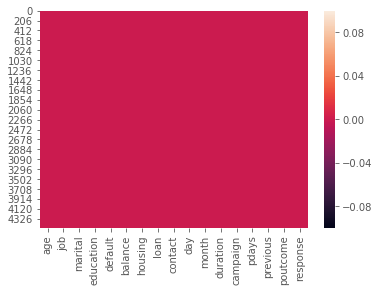

In [159]:
sns.heatmap(bank.isnull())

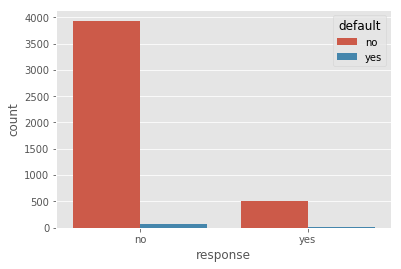

In [160]:
sns.countplot(x='response', hue='default', data=bank)

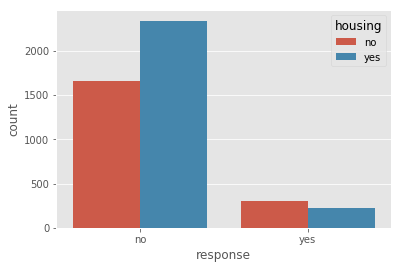

In [161]:
sns.countplot(x='response', hue='housing', data=bank)

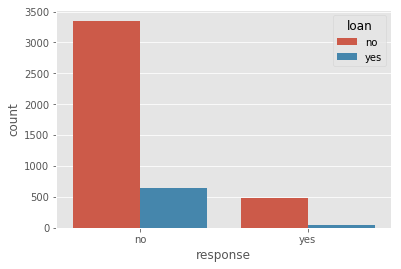

In [162]:
sns.countplot(x='response', hue='loan', data=bank)

In [163]:
pd.option_context('display.max_rows', None, 'display.max_columns', None)
# Count value distribution for three predictors: default, housing and loan
count_default = bank['default'].value_counts().to_dict()
count_housing = bank['housing'].value_counts().to_dict()
count_loan    = bank['loan'].value_counts().to_dict()
count_response = bank['response'].value_counts().to_dict()

print('default:', count_default)
print('housing:', count_housing)
print('loan:', count_loan)
print('response:', count_response)

default: {'no': 4445, 'yes': 76}
housing: {'yes': 2559, 'no': 1962}
loan: {'no': 3830, 'yes': 691}
response: {'no': 4000, 'yes': 521}


In [164]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
response     4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [165]:
# Create dummy variables for three predictors and one target variables
default = pd.get_dummies(bank['default'],drop_first=True)
housing = pd.get_dummies(bank['housing'],drop_first=True)
loan    = pd.get_dummies(bank['loan'],drop_first=True)
response= pd.get_dummies(bank['response'],drop_first=True)

In [166]:
# Drop original four working variables, three predictors plus one target
bank.drop(['default','housing','loan','response'], axis=1, inplace=True)
bank.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,1787,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,4789,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,1350,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,1476,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,0,unknown,5,may,226,1,-1,0,unknown


In [167]:
# Concatenate bank data with four generate dummy variables
bank = pd.concat([bank, default, housing, loan, response], axis=1 )
bank.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,yes,yes,yes,yes
0,30,unemployed,married,primary,1787,cellular,19,oct,79,1,-1,0,unknown,0,0,0,0
1,33,services,married,secondary,4789,cellular,11,may,220,1,339,4,failure,0,1,1,0
2,35,management,single,tertiary,1350,cellular,16,apr,185,1,330,1,failure,0,1,0,0
3,30,management,married,tertiary,1476,unknown,3,jun,199,4,-1,0,unknown,0,1,1,0
4,59,blue-collar,married,secondary,0,unknown,5,may,226,1,-1,0,unknown,0,1,0,0


In [168]:
bank.columns = ['age','job','marital','education','balance','contact','day', 'month','duration','campaign','pdays','previous', \
                'poutcome','default','housing','loan','response']
bank.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default,housing,loan,response
0,30,unemployed,married,primary,1787,cellular,19,oct,79,1,-1,0,unknown,0,0,0,0
1,33,services,married,secondary,4789,cellular,11,may,220,1,339,4,failure,0,1,1,0
2,35,management,single,tertiary,1350,cellular,16,apr,185,1,330,1,failure,0,1,0,0
3,30,management,married,tertiary,1476,unknown,3,jun,199,4,-1,0,unknown,0,1,1,0
4,59,blue-collar,married,secondary,0,unknown,5,may,226,1,-1,0,unknown,0,1,0,0


In [169]:
# Test, train split 0.3 for test
bank1 = bank[['default','housing','loan','response']]
bank2 = bank[['default','response']]
bank3 = bank[['housing','response']]
bank4 = bank[['loan','response']]

In [170]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

<Figure size 432x288 with 0 Axes>

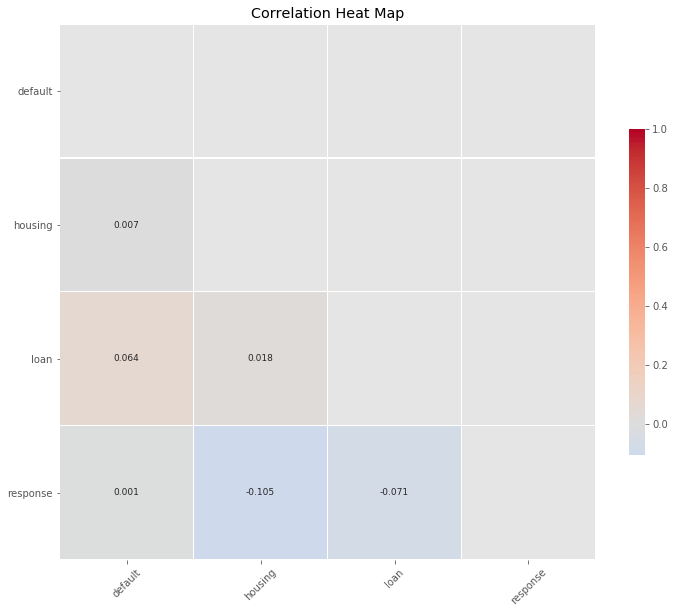

In [171]:
# examine intercorrelations among three predictors and one target variables 
# with correlation matrix/heat map
corr_chart(df_corr = bank1)

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank1.drop('response', axis=1), bank1['response'], 
                                                    test_size = 0.3, random_state=101)

In [173]:
# Training and predicting
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
pred_lr = logmodel.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [174]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1202
           1       0.00      0.00      0.00       155

   micro avg       0.89      0.89      0.89      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.78      0.89      0.83      1357



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


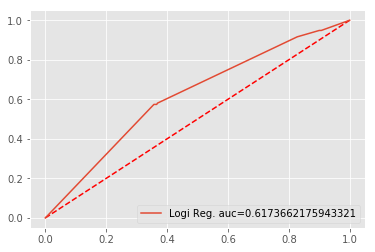

In [175]:
from sklearn import metrics
pred_lr_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_lr_proba)
auc = metrics.roc_auc_score(y_test, pred_lr_proba)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr,tpr,label="Logi Reg. auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [176]:
from sklearn.model_selection import cross_val_score
scores_lr = cross_val_score(logmodel, X_test, y_test, cv=10)
print(scores_lr)
print('average score: {}'.format(scores_lr.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.883 0.883 0.882 0.882 0.882 0.889 0.889 0.889 0.889 0.889]
average score: 0.885792662563809


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Three predictors and one target variable have low correlation among each other

# A: Logistic Regression Results
## A1. Three predictors together
### A1. ROC = 0.6174, cross validation score = 0.88579

## A2. Defualt
### A2. ROC = 0.4952 (no predicting power), cross validation score = 0.88579

## A3. Housing
### A3. ROC = 0.5906 (very weak predicting power), cross validation score = 0.88579

## A4. Loan
### A3. ROC = 0.5422 (very weak predicting power), cross validation score = 0.88579


In [177]:
# Naive Bayes regression test 
from sklearn.naive_bayes import GaussianNB

NBmodel = GaussianNB()
NBmodel.fit(X_train,y_train)
pred_NB = NBmodel.predict(X_test)

In [178]:
print(classification_report(y_test,pred_NB))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1202
           1       0.07      0.01      0.02       155

   micro avg       0.87      0.87      0.87      1357
   macro avg       0.48      0.50      0.48      1357
weighted avg       0.79      0.87      0.83      1357



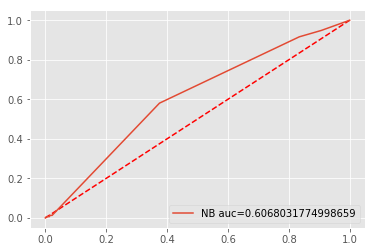

In [179]:
# Create AOC for Naive Bayes model
pred_NB_proba = NBmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_NB_proba)
auc = metrics.roc_auc_score(y_test, pred_NB_proba)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr,tpr,label="NB auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [180]:
scores_NB = cross_val_score(NBmodel, X_test, y_test, cv=10)
print(scores_NB)
print('average score: {}'.format(scores_NB.mean()))

[0.883 0.883 0.882 0.882 0.882 0.889 0.889 0.889 0.889 0.889]
average score: 0.885792662563809


# B: Naive Bayes Results
## B1. Three predictors together
### B1. ROC = 0.6068, cross validation score = 0.88579

## B2. Defualt
### B2. ROC = 0.4952 (no predicting power), cross validation score = 0.88579

## B3. Housing
### B3. ROC = 0.5906 (very weak predicting power), cross validation score = 0.88579

## B4. Loan
### B3. ROC = 0.5422 (very weak predicting power), cross validation score = 0.88579